In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import yfinance as yf
import requests
from yfinance import shared

In [2]:
from keras.models import Sequential
from keras.layers import SimpleRNN,Dense

In [3]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)

# ŸÜŸÖÿß€åÿ¥ GPU Ÿáÿß€å ÿ¥ŸÜÿßÿ≥ÿß€å€å ÿ¥ÿØŸá
gpus = tf.config.list_physical_devices('GPU')
print("Detected GPUs:", gpus)

TensorFlow version: 2.10.0
Detected GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
import torch
print("torch version:", torch.__version__)
print(torch.cuda.is_available())
print(torch.cuda.device_count())


torch version: 2.5.1
True
1


import yfinance as yf
import requests
from yfinance import shared

# Disable SSL verification (only for testing)
session = requests.Session()
session.verify = False  # Disable SSL certificate verification
shared._requests = session

ms_ds = yf.download('MSFT', start='2012-01-01', end='2021-12-31', auto_adjust=True, progress=False)
print(ms_ds.head())


In [6]:
ms_ds = yf.download('MSFT', start='2012-01-01', end='2021-12-31', auto_adjust=False, progress=False)

In [7]:
ms_ds

Price        Adj Close       Close        High         Low        Open  \
Ticker            MSFT        MSFT        MSFT        MSFT        MSFT   
Date                                                                     
2012-01-03   21.039213   26.770000   26.959999   26.389999   26.549999   
2012-01-04   21.534338   27.400000   27.469999   26.780001   26.820000   
2012-01-05   21.754395   27.680000   27.730000   27.290001   27.379999   
2012-01-06   22.092352   28.110001   28.190001   27.530001   27.530001   
2012-01-09   21.801556   27.740000   28.100000   27.719999   28.049999   
...                ...         ...         ...         ...         ...   
2021-12-23  324.979797  334.690002  336.390015  332.730011  332.750000   
2021-12-27  332.514709  342.450012  342.480011  335.429993  335.459991   
2021-12-28  331.349426  341.250000  343.809998  340.320007  343.149994   
2021-12-29  332.029144  341.950012  344.299988  339.679993  341.299988   
2021-12-30  329.475433  339.320007  343.130005  338.820007  341.910004   

Price         Volume  
Ticker          MSFT  
Date                  
2012-01-03  64731500  
2012-01-04  80516100  
2012-01-05  56081400  
2012-01-06  99455500  
2012-01-09  59706800  
...              ...  
2021-12-23  19617800  
2021-12-27  19947000  
2021-12-28  15661500  
2021-12-29  15042000  
2021-12-30  15994500  

[2516 rows x 6 columns]

In [8]:
print(ms_ds.columns)

MultiIndex([('Adj Close', 'MSFT'),
            (    'Close', 'MSFT'),
            (     'High', 'MSFT'),
            (      'Low', 'MSFT'),
            (     'Open', 'MSFT'),
            (   'Volume', 'MSFT')],
           names=['Price', 'Ticker'])


In [9]:
df = ms_ds[["Adj Close","Open", "Close", "High", "Low"]].round(3)
df.head(10)

Price      Adj Close   Open  Close   High    Low
Ticker          MSFT   MSFT   MSFT   MSFT   MSFT
Date                                            
2012-01-03    21.039  26.55  26.77  26.96  26.39
2012-01-04    21.534  26.82  27.40  27.47  26.78
2012-01-05    21.754  27.38  27.68  27.73  27.29
2012-01-06    22.092  27.53  28.11  28.19  27.53
2012-01-09    21.802  28.05  27.74  28.10  27.72
2012-01-10    21.880  27.93  27.84  28.15  27.75
2012-01-11    21.786  27.43  27.72  27.98  27.37
2012-01-12    22.006  27.87  28.00  28.02  27.65
2012-01-13    22.202  27.93  28.25  28.25  27.79
2012-01-17    22.210  28.40  28.26  28.65  28.17

<Axes: xlabel='Date'>

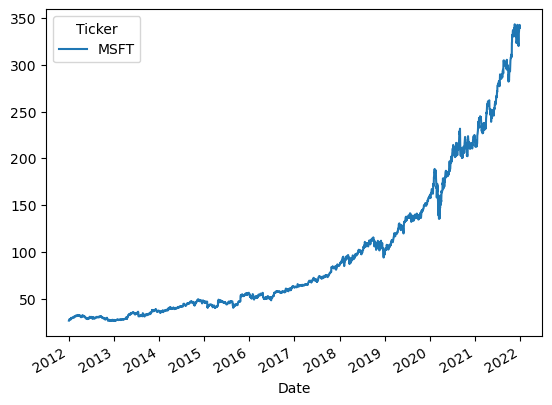

In [10]:
df.Close.plot()

In [11]:
df[:'2020'].Close.values.reshape(-1,1).shape

(2265, 1)

In [12]:
df['2021':].Close.values.reshape(-1,1).shape

(251, 1)

ÿ≠ÿßŸÑ ŸÖ€å ÿÆŸàÿßŸá€åŸÖ ÿ®ÿ± 6 ÿ™ÿß 6ÿ™ÿß ÿ®ÿ±€åŸÖ ÿ¨ŸÑŸà ÿ®ÿ±ÿßÿ≥ÿßÿ≥ 6 ÿ™ÿß 2 ÿ™ÿß ÿ¨ŸÑŸà€å ÿÆŸàÿØŸÖŸàŸÜŸà Ÿæ€åÿ¥ ÿ®€åŸÜ€å ⁄©ŸÜ€åŸÖ ⁄©Ÿá ÿ®Ÿá ÿµŸàÿ±ÿ™ ÿ≤€åÿ±Ÿá

In [14]:
train_df = df[:'2020'].Close.values.reshape(-1,1)
test_df = df['2021':].Close.values.reshape(-1,1)
x_train =[]
y_train = []
y_step = 2
x_step = 6
for i in range(x_step,len(train_df)-y_step+1):
    x_train.append(train_df[i-x_step: i,0])
    y_train.append(train_df[i:i+y_step,0])

In [15]:
np.array(x_train).shape

(2258, 6)

In [16]:
np.array(y_train).shape

(2258, 2)

⁄Ü⁄© ⁄©ŸÜ€åŸÖ

In [18]:
train_df[:8,0]

array([26.77, 27.4 , 27.68, 28.11, 27.74, 27.84, 27.72, 28.  ])

In [19]:
x_train[0]

array([26.77, 27.4 , 27.68, 28.11, 27.74, 27.84])

In [20]:
y_train[0]

array([27.72, 28.  ])

ÿßÿ≤ ÿ¢ÿÆÿ± ⁄Ü⁄© ⁄©ŸÜ€åŸÖ 

In [22]:
train_df[-8:,0]

array([222.59, 223.94, 221.02, 222.75, 224.96, 224.15, 221.68, 222.42])

In [23]:
x_train[-1]

array([222.59, 223.94, 221.02, 222.75, 224.96, 224.15])

In [24]:
y_train[-1]

array([221.68, 222.42])

ŸáŸÖŸàŸÜ ⁄Øÿßÿ±Ÿà ÿ®ÿ±ÿß€å ÿ™ÿ≥ÿ™ Ÿáÿß ÿßŸÜÿ¨ÿßŸÖ ŸÖ€åÿØ€åŸÖ

In [26]:
X = df.Close.values
X = X[len(X)-len(test_df)-x_step:]
X = X.reshape(-1, 1)

In [27]:
x_test = []
y_test = []
for i in range (x_step,len(test_df)+x_step -y_step +1):
    x_test.append(X[i-x_step:i, 0])
    y_test.append(X[i:i+y_step, 0])


In [28]:
test_df[-8:,0]

array([319.91, 327.29, 333.2 , 334.69, 342.45, 341.25, 341.95, 339.32])

In [29]:
x_test[-1]

array([319.91, 327.29, 333.2 , 334.69, 342.45, 341.25])

In [30]:
y_test[-1]

array([341.95, 339.32])

ŸáŸÖŸàŸÜÿßÿ±Ÿà ÿ™Ÿà€å €å⁄© ÿ™ÿßÿ®ÿπ ÿ®ŸÜŸà€åÿ≥€åŸÖ
* ÿ≥ÿÆÿ™ ŸÜ€åÿ≥ÿ™ÿ¥ ŸÅŸÇÿ∑ ÿ∑ŸàŸÑÿßŸÜ€åŸá

In [32]:
def ts_data(df, X_steps, y_steps):
  train_df = df[:"2020"].Close.values.reshape(-1, 1)
  test_df = df["2021":].Close.values.reshape(-1, 1)

  sc = MinMaxScaler(feature_range=(0, 1))
  train_df_scaled = sc.fit_transform(train_df)

  X_train = []
  y_train = []
  for i in range(X_steps, len(train_df_scaled)-y_steps+1):
    X_train.append(train_df_scaled[i-X_steps:i, 0])
    y_train.append(train_df_scaled[i:i+y_steps, 0])
  X_train = np.array(X_train)
  y_train = np.array(y_train)

  X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

  X = df.Close.values
  X = X[len(X)-len(test_df)-X_steps:]
  X = X.reshape(-1, 1)
  X = sc.transform(X)

  X_test = []
  y_test = []
  for i in range(X_steps, len(test_df)+X_steps-y_steps+1):
    X_test.append(X[i-X_steps:i, 0])
    y_test.append(X[i:i+y_steps, 0])

  X_test = np.array(X_test)
  X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
  y_test = np.array(y_test)

  return X_train, y_train, X_test, y_test, sc

ÿ®ÿ±ÿß€å ŸÅŸáŸÖ ÿ®€åÿ¥ÿ™ÿ± ŸÖÿ±ÿßÿ¨ÿπŸá ÿ¥ŸàÿØ ÿ®Ÿá ŸÅÿß€åŸÑ 
* sites\RNN ÿØÿßÿØŸá_Ÿáÿß€å ÿ≥ŸáÿßŸÖ.html

In [34]:
df[:"2020"].Close.values.reshape(-1, 1).shape

(2265, 1)

In [35]:
X_train, y_train, X_test, y_test, sc = ts_data(df, 6, 2)

In [36]:
X_train.shape

(2258, 6, 1)

In [37]:
y_train.shape

(2258, 2)

In [38]:
X_test.shape

(250, 6, 1)

In [39]:
y_test.shape

(250, 2)

## simple RNN
* ÿØÿßÿØŸá ÿ®Ÿá ŸÅÿ±ŸÖÿ™ ŸÖŸÜÿßÿ≥ÿ® ÿ®ÿ±ÿß€å ÿ¥ÿ®⁄©Ÿá Ÿáÿß€å ÿ™ÿ±ÿ™€åÿ®€å ÿØÿ± ÿßŸàŸÖÿØŸá ÿ≠ÿßŸÑÿß ÿ®Ÿá ÿµŸàÿ±ÿ™ ÿ≤€åÿ± ŸÖÿØŸÑ ÿ±ÿß ŸÖ€åÿ≥ÿßÿ≤€åŸÖ

In [41]:
simple_rnn_model = Sequential([
    SimpleRNN(50,return_sequences=True),
    SimpleRNN(50),
    #return_sequences=True
    # ÿß⁄Øÿ± ÿØ€å⁄ØŸá ŸÜŸÖ€åÿÆŸàÿßŸá€åŸÖ ÿ®Ÿá ŸÑÿß€åŸá ÿ™ŸàÿßŸÑ€å ÿØ€å⁄Øÿ±€å €åÿπŸÜ€å ÿ≥€åŸÖŸæŸÑ ÿßÿ± ŸÜ ŸÜ ŸàÿµŸÑ ⁄©ŸÜ€åŸÖ ÿØ€å⁄ØŸá ŸÜ€åÿßÿ≤ ÿ®Ÿá ÿ™Ÿàÿ±Ÿà ÿ®ŸàÿØŸÜ ŸÜÿØÿßÿ±ÿØ
    Dense(2)
])

In [42]:
simple_rnn_model.compile(optimizer="adam", loss="mean_squared_error")

In [43]:
simple_rnn_model.fit(X_train, y_train, epochs=100, validation_split=0.15)

Epoch 1/100
60/60 [==============================] - 4s 33ms/step - loss: 0.0115 - val_loss: 0.0234
Epoch 2/100
60/60 [==============================] - 2s 29ms/step - loss: 1.5186e-04 - val_loss: 0.0207
Epoch 3/100
60/60 [==============================] - 2s 26ms/step - loss: 1.3130e-04 - val_loss: 0.0169
Epoch 4/100
60/60 [==============================] - 2s 31ms/step - loss: 1.2656e-04 - val_loss: 0.0153
Epoch 5/100
60/60 [==============================] - 2s 29ms/step - loss: 1.0383e-04 - val_loss: 0.0119
Epoch 6/100
60/60 [==============================] - 2s 28ms/step - loss: 9.7851e-05 - val_loss: 0.0122
Epoch 7/100
60/60 [==============================] - 2s 28ms/step - loss: 8.6595e-05 - val_loss: 0.0089
Epoch 8/100
60/60 [==============================] - 2s 31ms/step - loss: 8.0632e-05 - val_loss: 0.0079
Epoch 9/100
60/60 [==============================] - 2s 28ms/step - loss: 8.3225e-05 - val_loss: 0.0070
Epoch 10/100
60/60 [==============================] - 2s 29ms/step -

## predicttion

In [45]:
df['2021':].index

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15',
               ...
               '2021-12-16', '2021-12-17', '2021-12-20', '2021-12-21',
               '2021-12-22', '2021-12-23', '2021-12-27', '2021-12-28',
               '2021-12-29', '2021-12-30'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)

In [46]:
len(y_test)

250

In [47]:
simple_rnn_pred = simple_rnn_model.predict(X_test)

8/8 [==============================] - 0s 10ms/step


In [48]:
simple_rnn_pred.shape

(250, 2)

In [49]:
def prediction_plot(predictions):
    fig, ax = plt.subplots()
    ax.plot(df["2021":].index[:len(y_test)],
          sc.inverse_transform(y_test[:, 0].reshape(-1, 1)), label="Real")
    ax.plot(df["2021":].index[:len(y_test)],
          sc.inverse_transform(predictions[:, 0].reshape(-1, 1)), label="Prediction")
    plt.legend()
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.title("Real vs Predicted Stock Price - 2021")
    plt.grid(True)
    plt.show()

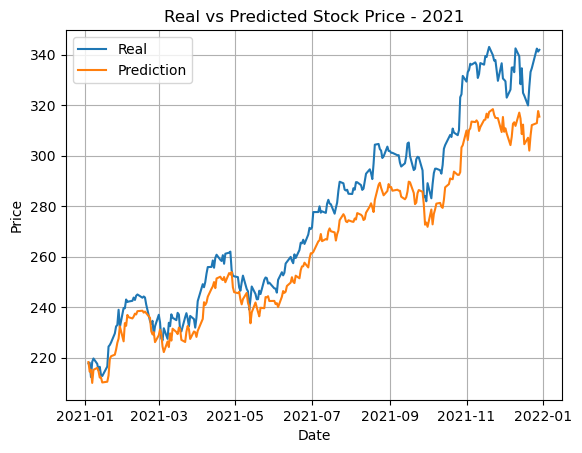

In [50]:
prediction_plot(simple_rnn_pred)

# lstm

In [52]:
from keras.layers import LSTM

In [53]:
lstm = Sequential([
                    LSTM(50, return_sequences=True),
                    LSTM(50),
                    Dense(2)
                  ])

In [54]:
lstm.compile(optimizer="adam", loss="mean_squared_error")

In [55]:
lstm.compile(optimizer="adam", loss="mean_squared_error")

In [56]:
lstm.fit(X_train, y_train, epochs=100, validation_split=0.15)

Epoch 1/100
60/60 [==============================] - 9s 33ms/step - loss: 0.0080 - val_loss: 0.0222
Epoch 2/100
60/60 [==============================] - 1s 15ms/step - loss: 1.3734e-04 - val_loss: 0.0031
Epoch 3/100
60/60 [==============================] - 1s 13ms/step - loss: 9.3018e-05 - val_loss: 0.0014
Epoch 4/100
60/60 [==============================] - 1s 12ms/step - loss: 8.0711e-05 - val_loss: 0.0010
Epoch 5/100
60/60 [==============================] - 1s 11ms/step - loss: 7.0123e-05 - val_loss: 0.0013
Epoch 6/100
60/60 [==============================] - 1s 12ms/step - loss: 6.6442e-05 - val_loss: 0.0012
Epoch 7/100
60/60 [==============================] - 1s 13ms/step - loss: 6.8065e-05 - val_loss: 0.0018
Epoch 8/100
60/60 [==============================] - 1s 13ms/step - loss: 6.5817e-05 - val_loss: 0.0012
Epoch 9/100
60/60 [==============================] - 1s 14ms/step - loss: 6.6497e-05 - val_loss: 0.0015
Epoch 10/100
60/60 [==============================] - 1s 12ms/step -

8/8 [==============================] - 1s 9ms/step


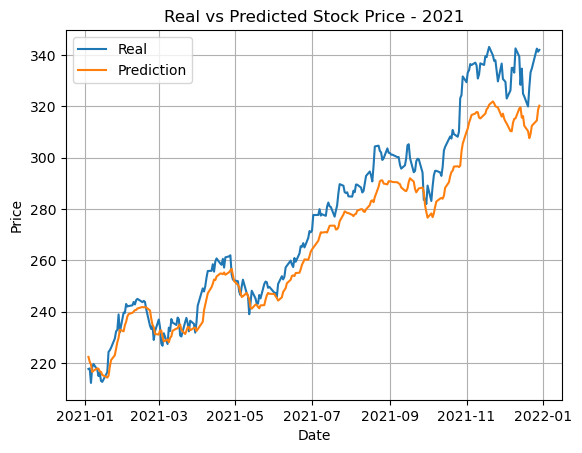

In [57]:
prediction_plot(lstm.predict(X_test))

# glounts (DEEP AR)

In [59]:
import gluonts
from gluonts.dataset.common import ListDataset
from gluonts.dataset.util import to_pandas

In [60]:
print(df.Close[:'2020'].shape)
print(df.head())
print(df.index)

(2265, 1)
Price      Adj Close   Open  Close   High    Low
Ticker          MSFT   MSFT   MSFT   MSFT   MSFT
Date                                            
2012-01-03    21.039  26.55  26.77  26.96  26.39
2012-01-04    21.534  26.82  27.40  27.47  26.78
2012-01-05    21.754  27.38  27.68  27.73  27.29
2012-01-06    22.092  27.53  28.11  28.19  27.53
2012-01-09    21.802  28.05  27.74  28.10  27.72
DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2021-12-16', '2021-12-17', '2021-12-20', '2021-12-21',
               '2021-12-22', '2021-12-23', '2021-12-27', '2021-12-28',
               '2021-12-29', '2021-12-30'],
              dtype='datetime64[ns]', name='Date', length=2516, freq=None)


In [61]:
print(df.Close[:'2020'].shape)          # ÿ®ÿß€åÿØ ⁄Ü€åÿ≤€å ŸÖÿ´ŸÑ (2265,) ÿ®ÿßÿ¥Ÿá
print(df.Close[:'2020'].values.shape)   # ÿ®ÿß€åÿØ ŸáŸÖŸàŸÜ ÿ®ÿßÿ¥Ÿá
print(df.Close[:'2020'].values.squeeze().ndim)  # ÿ®ÿß€åÿØ 1 ÿ®ÿ¥Ÿá


(2265, 1)
(2265, 1)
1


In [62]:
train_data = ListDataset([
        {
        'start': df.index[0],
        'target': df.Close[:'2020'].values.squeeze()  # €åÿß .flatten()
            }
                            ],
                         freq='D')


In [63]:
train_list_data = next(iter(train_data))
train_series = to_pandas(train_list_data)

In [64]:
train_series

2012-01-03     26.770000
2012-01-04     27.400000
2012-01-05     27.680000
2012-01-06     28.110001
2012-01-07     27.740000
                 ...    
2018-03-12    222.750000
2018-03-13    224.960007
2018-03-14    224.149994
2018-03-15    221.679993
2018-03-16    222.419998
Freq: D, Length: 2265, dtype: float32

In [65]:
train_series.values

array([ 26.77,  27.4 ,  27.68, ..., 224.15, 221.68, 222.42], dtype=float32)

<Axes: >

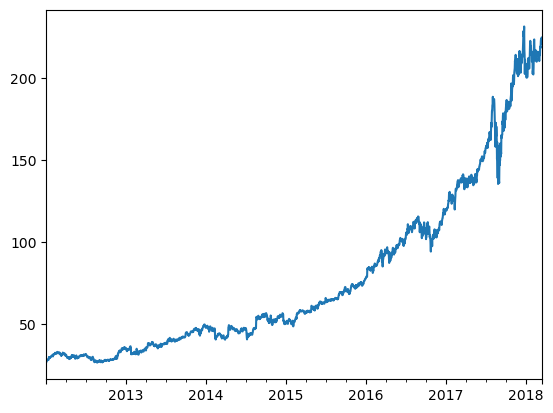

In [66]:
train_series.plot()

In [67]:
df.index = pd.to_datetime(df.index)

In [68]:
test_Data = ListDataset([
        {
        'start': df.index[0],
        'target': df.Close.values.squeeze()  # €åÿß .flatten()
            }
                            ],
                         freq='D')


In [69]:
test_list_data = next(iter(test_Data))
test_seris_data = to_pandas(test_list_data)

In [70]:
test_seris_data.values

array([ 26.77,  27.4 ,  27.68, ..., 341.25, 341.95, 339.32], dtype=float32)

<Axes: >

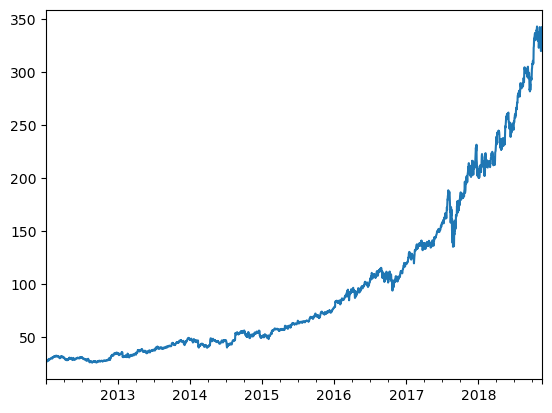

In [71]:
test_seris_data.plot()

In [72]:
from gluonts.torch.model.deepar import DeepAREstimator
from gluonts.dataset.common import ListDataset
from gluonts.evaluation import Evaluator, make_evaluation_predictions

from lightning.pytorch import Trainer as PLTrainer
from lightning.pytorch.callbacks import EarlyStopping, LearningRateMonitor


In [73]:
# üöÄ ÿ™ŸÜÿ∏€åŸÖÿßÿ™ ÿ®Ÿá€åŸÜŸá‚Äåÿ¥ÿØŸá ŸÖÿØŸÑ DeepAR
callbacks = [
    EarlyStopping(monitor="train_loss", patience=15, mode="min"),
    LearningRateMonitor(logging_interval='epoch')
]

In [74]:
from gluonts.torch.distributions.studentT import StudentTOutput
from gluonts.torch.distributions.distribution_output import NormalOutput

deepAR_model = DeepAREstimator(
    freq="D",                     # ŸÅÿ±⁄©ÿßŸÜÿ≥ ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ≥ÿ±€å ÿ≤ŸÖÿßŸÜ€å (ŸÖÿ´ŸÑÿßŸã ÿ±Ÿàÿ≤ÿßŸÜŸá)
    prediction_length=5,         # ⁄ÜŸÜÿØ ÿ±Ÿàÿ≤ ÿ¢€åŸÜÿØŸá ÿ±ÿß Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å ⁄©ŸÜ€åŸÖ
    context_length=20,           # ⁄ÜŸÜÿØ ÿ±Ÿàÿ≤ ⁄Øÿ∞ÿ¥ÿ™Ÿá ÿ®ÿ±ÿß€å ÿ¢ŸÖŸàÿ≤ÿ¥ ŸÖÿØŸÑ ÿØÿ± ŸÜÿ∏ÿ± ⁄Øÿ±ŸÅÿ™Ÿá ÿ¥ŸàÿØ
    num_layers=6,                # ÿ™ÿπÿØÿßÿØ ŸÑÿß€åŸá‚ÄåŸáÿß€å LSTM
    hidden_size=150,             # ÿßŸÜÿØÿßÿ≤Ÿá‚Äå€å ŸÖÿÆŸÅ€å Ÿáÿ± ŸÑÿß€åŸá (ÿ∏ÿ±ŸÅ€åÿ™ ŸÖÿØŸÑ)
    dropout_rate=0.1,            # ÿ®ÿ±ÿß€å ÿ¨ŸÑŸà⁄Ø€åÿ±€å ÿßÿ≤ overfitting
    distr_output=StudentTOutput(),  # ÿ™Ÿàÿ≤€åÿπ ÿÆÿ±Ÿàÿ¨€å ÿ®ÿ±ÿß€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ŸÜŸàÿ≥ÿßŸÜ€å ÿ®Ÿáÿ™ÿ± ÿßÿ≤ NormalOutput
    scaling=True,                # ŸÖŸÇ€åÿßÿ≥‚Äåÿ®ŸÜÿØ€å ÿÆŸàÿØ⁄©ÿßÿ± ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®ÿ≥€åÿßÿ± ŸÖŸáŸÖ ÿßÿ≥ÿ™
    trainer_kwargs={             # Ÿæÿßÿ±ÿßŸÖÿ™ÿ±Ÿáÿß€å ŸÖÿ±ÿ®Ÿàÿ∑ ÿ®Ÿá Trainer (lightning)
        "max_epochs": 30,                    # ÿ™ÿπÿØÿßÿØ epochŸáÿß ÿ®ÿ±ÿß€å ÿ¢ŸÖŸàÿ≤ÿ¥
        "callbacks": callbacks,              # early stopping Ÿà lr monitor
        "accelerator": "auto",               # ÿßÿ≥ÿ™ŸÅÿßÿØŸá ÿÆŸàÿØ⁄©ÿßÿ± ÿßÿ≤ GPU ÿØÿ± ÿµŸàÿ±ÿ™ Ÿàÿ¨ŸàÿØ
        "enable_model_summary": False,       # ÿ∫€åÿ±ŸÅÿπÿßŸÑ‚Äåÿ≥ÿßÿ≤€å ÿÆŸÑÿßÿµŸá ŸÖÿØŸÑ
        "gradient_clip_val": 1.0,            # ÿ®ÿ±ÿß€å ÿ¨ŸÑŸà⁄Ø€åÿ±€å ÿßÿ≤ ⁄Øÿ±ÿßÿØ€åÿßŸÜ ÿßŸÜŸÅÿ¨ÿßÿ±€å
        "log_every_n_steps": 25,             # ÿ™ÿπÿØÿßÿØ ⁄ØÿßŸÖ ÿ®€åŸÜ ŸÑÿß⁄Ø‚Äå⁄Ø€åÿ±€å‚ÄåŸáÿß
    }
)

In [75]:
import torch
# ‚öôÔ∏è ÿ™ŸÜÿ∏€åŸÖ ÿØŸÇ€åŸÇ ÿ®ÿ±ÿß€å ŸÖÿ≠ÿßÿ≥ÿ®ÿßÿ™ ÿ≥ÿ±€åÿπ‚Äåÿ™ÿ±
torch.set_float32_matmul_precision('high')

In [76]:
deepAR_model_predictator = deepAR_model.train(train_data)
#                          deepAR_model.train(train_data, validation_data=val_data)


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
C:\ProgramData\anaconda3\envs\ai\lib\site-packages\lightning\pytorch\trainer\configuration_validator.py:70: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Training: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 50: 'train_loss' reached 4.26427 (best 4.26427), saving model to 'C:\\Users\\AERO\\Downloads\\Video\\projects\\lightning_logs\\version_21\\checkpoints\\epoch=0-step=50.ckpt' as top 1
Epoch 1, global step 100: 'train_loss' reached 2.56640 (best 2.56640), saving model to 'C:\\Users\\AERO\\Downloads\\Video\\projects\\lightning_logs\\version_21\\checkpoints\\epoch=1-step=100.ckpt' as top 1
Epoch 2, global step 150: 'train_loss' was not in top 1
Epoch 3, global step 200: 'train_loss' reached 2.17349 (best 2.17349), saving model to 'C:\\Users\\AERO\\Downloads\\Video\\projects\\lightning_logs\\version_21\\checkpoints\\epoch=3-step=200.ckpt' as top 1
Epoch 4, global step 250: 'train_loss' was not in top 1
Epoch 5, global step 300: 'train_loss' was not in top 1
Epoch 6, global step 350: 'train_loss' was not in top 1
Epoch 7, global step 400: 'train_loss' was not in top 1
Epoch 8, global step 450: 'train_loss' was not in top 1
Epoch 9, global step 500: 'train_loss' reached 2

In [77]:
from gluonts.evaluation import make_evaluation_predictions

In [78]:
forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_Data,  # test dataset
    predictor=deepAR_model_predictator,  # predictor
    num_samples=300,  # number of sample paths we want for evaluation
)

In [79]:
forecasts = list(forecast_it)
tss = list(ts_it)

In [80]:
ts_entry = tss[0]

In [81]:
forecast_entry = forecasts[0]

In [82]:
forecast_entry.samples.shape

(300, 5)

In [83]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def plot_prob_forecasts_improved(ts_entry, forecast_entry, plot_length=15, figsize=(12, 8)):
    if len(ts_entry) < plot_length:
        plot_length = len(ts_entry)
        print(f"‚ö†Ô∏è Warning: plot_length adjusted to {plot_length}")

    fig, ax = plt.subplots(figsize=figsize)
    historical_data = ts_entry[-plot_length:]

    # ÿß⁄Øÿ± PeriodIndex ÿ®ŸàÿØÿå ÿ®Ÿá Timestamp ÿ™ÿ®ÿØ€åŸÑ ⁄©ŸÜ
    if isinstance(historical_data.index, pd.PeriodIndex):
        historical_data.index = historical_data.index.to_timestamp()

    ax.plot(historical_data.index, historical_data.values, 
            color='#2E86AB', linewidth=2.5, label='Observations', marker='o', markersize=4)

    try:
        median = forecast_entry.quantile(0.5)
        p50_lower = forecast_entry.quantile(0.25)
        p50_upper = forecast_entry.quantile(0.75)
        p90_lower = forecast_entry.quantile(0.05)
        p90_upper = forecast_entry.quantile(0.95)

        # ÿßÿ≥ÿ™ŸÅÿßÿØŸá ŸÖÿ≥ÿ™ŸÇ€åŸÖ ÿßÿ≤ forecast_entry.freq
        prediction_index = pd.date_range(
            start=forecast_entry.start_date.to_timestamp() 
                  if isinstance(forecast_entry.start_date, pd.Period) 
                  else forecast_entry.start_date,
            periods=len(median),
            freq=forecast_entry.freq
        )

        ax.fill_between(prediction_index, p90_lower, p90_upper, 
                       color='#A8DADC', alpha=0.3, label='90% Prediction Interval')
        ax.fill_between(prediction_index, p50_lower, p50_upper, 
                       color='#457B9D', alpha=0.5, label='50% Prediction Interval')
        ax.plot(prediction_index, median, color='#E63946', linewidth=2.5, 
                label='Median Prediction', marker='s', markersize=4)

        forecast_mean = np.mean(median)
        historical_mean = np.mean(historical_data.values)
        trend_change = forecast_mean - historical_data.values[-1]

        print("üìä Forecast Analysis:")
        print(f"   Last Historical Value: {float(historical_data.values[-1]):.2f}")
        print(f"   Forecast Mean: {float(forecast_mean):.2f}")
        print(f"   Trend Change: {float(trend_change):+.2f}")
        print(f"   Historical Mean: {float(historical_mean):.2f}")


        interval_width_50 = np.mean(p50_upper - p50_lower)
        interval_width_90 = np.mean(p90_upper - p90_lower)
        historical_std = np.std(historical_data.values)

        print(f"\nüîç Uncertainty Analysis:")
        print(f"   50% Interval Width: {interval_width_50:.2f}")
        print(f"   90% Interval Width: {interval_width_90:.2f}")
        print(f"   Historical Std: {historical_std:.2f}")
        if interval_width_90 < historical_std:
            print("   ‚ö†Ô∏è Warning: Model may be overconfident!")

    except Exception as e:
        print(f"‚ùå Error in processing forecast: {e}")
        return fig, ax

    ax.grid(True, alpha=0.3, linestyle='--')
    ax.legend(loc="upper left", frameon=True, fancybox=True, shadow=True)
    ax.set_xlabel('Date', fontsize=12, fontweight='bold')
    ax.set_ylabel('Value', fontsize=12, fontweight='bold')
    ax.set_title('Time Series Forecasts with Confidence Intervals', 
                 fontsize=14, fontweight='bold', pad=20)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
    ax.axvline(x=historical_data.index[-1], color='gray', linestyle=':', alpha=0.7, linewidth=1)
    ax.text(historical_data.index[-1], ax.get_ylim()[1]*0.95, 
            'Forecast Start', rotation=90, ha='right', va='top', 
            fontsize=10, alpha=0.7)

    plt.tight_layout()
    return fig, ax

def diagnose_forecast_quality(ts_entry, forecast_entry, plot_length=15):
    print("üî¨ Model Diagnosis:")
    print("=" * 50)
    try:
        historical_data = ts_entry[-plot_length:]
        if isinstance(historical_data.index, pd.PeriodIndex):
            historical_data.index = historical_data.index.to_timestamp()
        median = forecast_entry.quantile(0.5)
        historical_trend = float(historical_data.values[-1] - historical_data.values[0])
        forecast_trend = float(median[-1] - median[0]) if len(median) > 1 else 0.0

        print(f"üìà Trend Analysis:")
        print(f"   Historical Trend: {historical_trend:+.2f}")
        print(f"   Forecast Trend: {forecast_trend:+.2f}")
        if abs(historical_trend) > 5 and abs(forecast_trend) < 1:
            print("   ‚ö†Ô∏è WARNING: Model not capturing recent trend!")

        historical_volatility = np.std(historical_data.values)
        p90_lower = forecast_entry.quantile(0.05)
        p90_upper = forecast_entry.quantile(0.95)
        forecast_uncertainty = float(np.mean(p90_upper - p90_lower))

        print(f"\nüìä Volatility Analysis:")
        print(f"   Historical Volatility: {historical_volatility:.2f}")
        print(f"   Forecast Uncertainty: {forecast_uncertainty:.2f}")
        if forecast_uncertainty < historical_volatility * 0.5:
            print("   ‚ö†Ô∏è WARNING: Model may be overconfident!")

        print(f"\nüí° Recommendations:")
        if abs(historical_trend) > 5 and abs(forecast_trend) < 1:
            print("   - Consider using trend-aware models (Prophet, ARIMA with trend)")
            print("   - Check if recent data is included in training")
        if forecast_uncertainty < historical_volatility * 0.5:
            print("   - Increase model uncertainty (adjust hyperparameters)")
            print("   - Consider ensemble methods")
    except Exception as e:
        print(f"‚ùå Error in diagnosis: {e}")

def enhanced_forecast_analysis(ts_entry, forecast_entry, plot_length=15):
    print("üöÄ Enhanced Forecast Analysis")
    print("=" * 50)
    fig, ax = plot_prob_forecasts_improved(ts_entry, forecast_entry, plot_length)
    diagnose_forecast_quality(ts_entry, forecast_entry, plot_length)
    plt.show()
    return fig, ax


üöÄ Enhanced Forecast Analysis
üìä Forecast Analysis:
   Last Historical Value: 339.32
   Forecast Mean: 340.93
   Trend Change: +1.61
   Historical Mean: 333.79

üîç Uncertainty Analysis:
   50% Interval Width: 9.53
   90% Interval Width: 29.01
   Historical Std: 7.22
üî¨ Model Diagnosis:
üìà Trend Analysis:
   Historical Trend: +6.22
   Forecast Trend: +0.75
   ‚ö†Ô∏è WARNING: Model not capturing recent trend!

üìä Volatility Analysis:
   Historical Volatility: 7.22
   Forecast Uncertainty: 29.01

üí° Recommendations:
   - Consider using trend-aware models (Prophet, ARIMA with trend)
   - Check if recent data is included in training


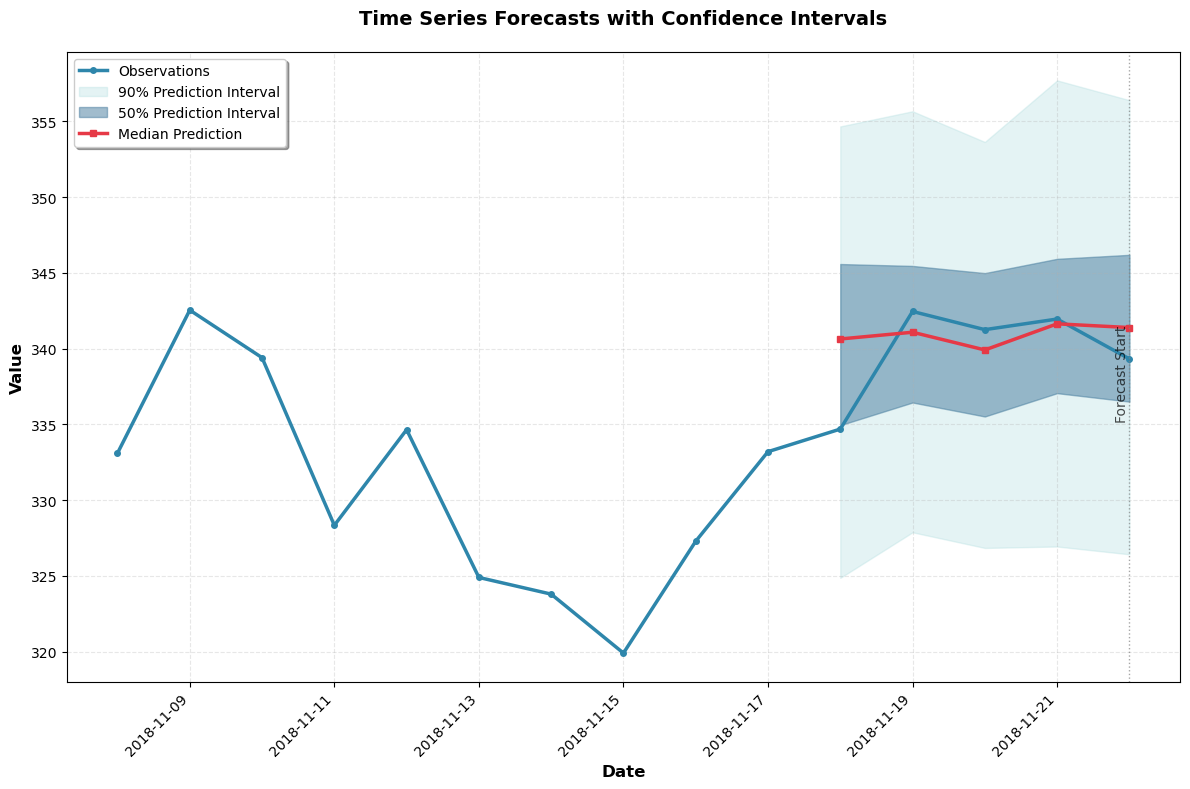

(<Figure size 1200x800 with 1 Axes>,
 <Axes: title={'center': 'Time Series Forecasts with Confidence Intervals'}, xlabel='Date', ylabel='Value'>)

In [84]:
# ŸÅÿ±ÿßÿÆŸàÿßŸÜ€å:
enhanced_forecast_analysis(ts_entry, forecast_entry)

# DARTS

In [8]:
import darts

In [9]:
import darts.utils.timeseries_generation as tg 
from darts.models import RNNModel
from darts.utils.likelihood_models import GaussianLikelihood
from darts.datasets import EnergyDataset, AirPassengersDataset
from darts.dataprocessing.transformers import Scaler
from darts.utils.missing_values import fill_missing_values
from darts import TimeSeries
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from pandas import Timestamp

C:\ProgramData\anaconda3\envs\ai\lib\site-packages\fs\__init__.py:4: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  __import__("pkg_resources").declare_namespace(__name__)  # type: ignore


In [12]:
signal_length = 400

signal_series = tg.linear_timeseries(
    start_value=0,
    end_value=4,
    start=None,
    end=Timestamp('2020-01-01 00:00:00'),
    length=signal_length,
    freq='D',
    column_name='Close'
)

In [14]:
signal_series

<TimeSeries (time: 400, component: 1, sample: 1)> Size: 3kB
array([[[0.        ]],

       [[0.01002506]],

       [[0.02005013]],

       [[0.03007519]],

       [[0.04010025]],

       [[0.05012531]],

       [[0.06015038]],

       [[0.07017544]],

       [[0.0802005 ]],

       [[0.09022556]],

...

       [[3.90977444]],

       [[3.9197995 ]],

       [[3.92982456]],

       [[3.93984962]],

       [[3.94987469]],

       [[3.95989975]],

       [[3.96992481]],

       [[3.97994987]],

       [[3.98997494]],

       [[4.        ]]])
Coordinates:
  * time       (time) datetime64[ns] 3kB 2018-11-28 2018-11-29 ... 2020-01-01
  * component  (component) object 8B 'Close'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None
    metadata:           None

In [16]:
signal_series.values().shape

(400, 1)

In [18]:
signal_series.all_values().shape

(400, 1, 1)

### ÿ≥ÿßÿÆÿ™ ÿØÿßÿØŸá ŸÖÿµŸÜŸàÿπ€å 

<Axes: xlabel='time'>

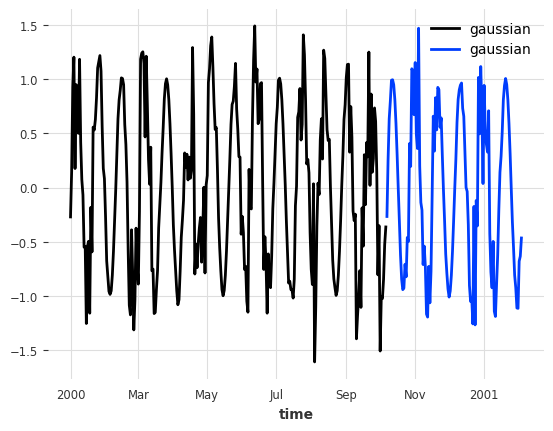

In [21]:
# ÿ∑ŸàŸÑ ÿ≥ÿ±€å ÿ≤ŸÖÿßŸÜ€å ÿ±ÿß ŸÖÿ¥ÿÆÿµ ŸÖ€å‚Äå⁄©ŸÜ€åŸÖ (ÿ™ÿπÿØÿßÿØ ŸÜŸÇÿßÿ∑ ÿØÿßÿØŸá)
signal_length = 400

# ÿ™ŸàŸÑ€åÿØ ÿ≥ÿ±€å ÿ≤ŸÖÿßŸÜ€å ÿÆÿ∑€å (trend) ÿßÿ≤ ŸÖŸÇÿØÿßÿ± ÿßŸàŸÑ€åŸá ÿ®Ÿá ÿ≥ŸÖÿ™ 4 ÿØÿ± ÿ∑ŸàŸÑ 400 ŸÜŸÇÿ∑Ÿá
signal_trend = tg.linear_timeseries(length=signal_length, end_value=4)

# ÿ™ŸàŸÑ€åÿØ ÿ≥€å⁄ØŸÜÿßŸÑ ÿ≥€åŸÜŸàÿ≥€å ÿ®ÿß ŸÅÿ±⁄©ÿßŸÜÿ≥ 0.05 Ÿà ÿØÿßŸÖŸÜŸá 1.0
sine_signal = tg.sine_timeseries(length=signal_length,
                                 value_frequency=0.05,
                                 value_amplitude=1.0)

# ÿ™ŸàŸÑ€åÿØ ŸÜŸà€åÿ≤ ⁄ØŸàÿ≥€å (Gaussian noise) ÿ®ÿß ÿßŸÜÿ≠ÿ±ÿßŸÅ ŸÖÿπ€åÿßÿ± 0.5
noise = tg.gaussian_timeseries(length=signal_length, std=0.5)

# ÿ™ŸàŸÑ€åÿØ ŸÜŸà€åÿ≤ ŸÜŸàÿ≥ÿßŸÜ€å ÿ∂ÿπ€åŸÅ ⁄©Ÿá ŸÖŸÇÿØÿßÿ±ÿ¥ ÿ®€åŸÜ 0.5 ÿ™ÿß 1.5 ŸÜŸàÿ≥ÿßŸÜ ÿØÿßÿ±ÿØ
noise_sine = (
    tg.sine_timeseries(length=signal_length, value_frequency=0.02) +  # ÿ≥€å⁄ØŸÜÿßŸÑ ÿ≥€åŸÜŸàÿ≥€å ⁄©ŸÜÿØ
    tg.constant_timeseries(length=signal_length, value=1)             # ŸÖŸÇÿØÿßÿ± ÿ´ÿßÿ®ÿ™ €±
) / 2  # ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ÿß€åŸÜ ÿØŸà (ŸÜŸà€åÿ≤ ÿ®ÿß ÿØÿßŸÖŸÜŸá ŸÖÿ™ÿ∫€åÿ±)

# ÿ∂ÿ±ÿ® ŸÜŸà€åÿ≤ ÿßÿµŸÑ€å ÿØÿ± ŸÜŸà€åÿ≤ ŸÜŸàÿ≥ÿßŸÜ€å ÿ®ÿ±ÿß€å ÿ≥ÿßÿÆÿ™ ŸÜŸà€åÿ≤ Ÿæ€å⁄Ü€åÿØŸá‚Äåÿ™ÿ±
noise = noise * noise_sine

# ÿ¨ŸÖÿπ ŸÜŸà€åÿ≤ Ÿà ÿ≥€å⁄ØŸÜÿßŸÑ ÿ≥€åŸÜŸàÿ≥€å ÿ®ÿ±ÿß€å ÿ≥ÿßÿÆÿ™ ÿ≥€å⁄ØŸÜÿßŸÑ ŸáÿØŸÅ ŸÜŸáÿß€å€å (target series)
target_series = sum([noise, sine_signal])

# ÿ™ŸÇÿ≥€åŸÖ ÿØÿßÿØŸá ÿ®Ÿá ÿØŸà ÿ®ÿÆÿ¥: ÿ¢ŸÖŸàÿ≤ÿ¥ (€∑€∞Ÿ™ ÿßŸàŸÑ) Ÿà ÿßÿπÿ™ÿ®ÿßÿ±ÿ≥ŸÜÿ¨€å (€≥€∞Ÿ™ Ÿæÿß€åÿßŸÜ€å)
target_train, target_val = target_series.split_after(0.7)

# ÿ±ÿ≥ŸÖ ŸÜŸÖŸàÿØÿßÿ± ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ¢ŸÖŸàÿ≤ÿ¥€å
target_train.plot()

# ÿ±ÿ≥ŸÖ ŸÜŸÖŸàÿØÿßÿ± ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿßÿπÿ™ÿ®ÿßÿ±ÿ≥ŸÜÿ¨€å
target_val.plot()


## ÿ≥ÿßÿÆÿ™ ŸÖÿØŸÑ

In [24]:
rnn_model = RNNModel(
    model="LSTM",
    hidden_dim=30,
    n_rnn_layers=5,
    dropout=0.2,
    n_epochs=15,
    optimizer_kwargs={"lr":1e-3},
    input_chunk_length=20,
    training_length=50,
    likelihood=GaussianLikelihood(),

)

In [ ]:
rnn_model.fit(series=target_train, val_series=target_val)


## Ÿæ€åÿ¥ ÿ®€åŸÜ€å ŸÖÿØŸÑ ÿ®ÿ±ÿß€å 50 ÿ±Ÿàÿ≤ ÿ¢€åŸÜÿØŸá

In [28]:
rnn_model.predict(50, num_samples=50).all_values().shape

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

(50, 1, 50)

In [29]:
rnn_model.predict(50, num_samples=50)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

<TimeSeries (time: 50, component: 1, sample: 50)> Size: 20kB
array([[[ 0.03087926, -0.46651306,  0.35739591, ..., -0.01956485,
          0.19287664,  0.53758551]],

       [[ 0.12371953,  0.4781481 ,  0.68144367, ...,  1.70078069,
          0.25101203, -0.41871888]],

       [[ 0.34119012,  1.24828234,  0.66046177, ...,  0.44160817,
          0.13738656,  1.06480072]],

       ...,

       [[ 0.79237832,  0.45253216,  0.59638213, ...,  0.43750875,
         -0.03946164,  1.12497039]],

       [[ 0.08895538,  0.8892714 ,  0.4860895 , ...,  0.74864852,
          0.45686555,  0.63513579]],

       [[-0.36997788, -0.18284236, -0.23600581, ...,  0.59353077,
         -0.37389029,  0.45672975]]])
Coordinates:
  * time       (time) datetime64[ns] 400B 2000-10-07 2000-10-08 ... 2000-11-25
  * component  (component) object 8B 'gaussian'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None
    metadata:           None

In [30]:
pred = rnn_model.predict(50, num_samples=50)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

<Axes: xlabel='time'>

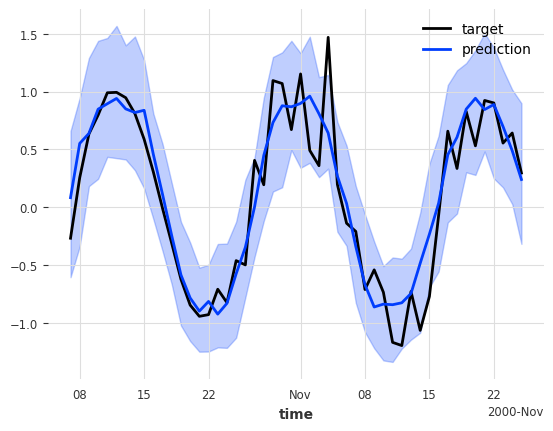

In [31]:
target_val.slice_intersect(pred).plot(label='target')
pred.plot(label='prediction')

### €å⁄© ÿØ€åÿ™ÿßÿ≥ÿ™ ÿ¨ÿØ€åÿØ

In [33]:
energy_df = EnergyDataset().load().to_dataframe()

In [34]:
energy_df

generation biomass  generation fossil brown coal/lignite  \
time                                                                            
2014-12-31 23:00:00               447.0                                 329.0   
2015-01-01 00:00:00               449.0                                 328.0   
2015-01-01 01:00:00               448.0                                 323.0   
2015-01-01 02:00:00               438.0                                 254.0   
2015-01-01 03:00:00               428.0                                 187.0   
...                                 ...                                   ...   
2018-12-31 18:00:00               297.0                                   0.0   
2018-12-31 19:00:00               296.0                                   0.0   
2018-12-31 20:00:00               292.0                                   0.0   
2018-12-31 21:00:00               293.0                                   0.0   
2018-12-31 22:00:00               290.0                                   0.0   

                     generation fossil coal-derived gas  \
time                                                      
2014-12-31 23:00:00                                 0.0   
2015-01-01 00:00:00                                 0.0   
2015-01-01 01:00:00                                 0.0   
2015-01-01 02:00:00                                 0.0   
2015-01-01 03:00:00                                 0.0   
...                                                 ...   
2018-12-31 18:00:00                                 0.0   
2018-12-31 19:00:00                                 0.0   
2018-12-31 20:00:00                                 0.0   
2018-12-31 21:00:00                                 0.0   
2018-12-31 22:00:00                                 0.0   

                     generation fossil gas  generation fossil hard coal  \
time                                                                      
2014-12-31 23:00:00                 4844.0                       4821.0   
2015-01-01 00:00:00                 5196.0                       4755.0   
2015-01-01 01:00:00                 4857.0                       4581.0   
2015-01-01 02:00:00                 4314.0                       4131.0   
2015-01-01 03:00:00                 4130.0                       3840.0   
...                                    ...                          ...   
2018-12-31 18:00:00                 7634.0                       2628.0   
2018-12-31 19:00:00                 7241.0                       2566.0   
2018-12-31 20:00:00                 7025.0                       2422.0   
2018-12-31 21:00:00                 6562.0                       2293.0   
2018-12-31 22:00:00                 6926.0                       2166.0   

                     generation fossil oil  generation fossil oil shale  \
time                                                                      
2014-12-31 23:00:00                  162.0                          0.0   
2015-01-01 00:00:00                  158.0                          0.0   
2015-01-01 01:00:00                  157.0                          0.0   
2015-01-01 02:00:00                  160.0                          0.0   
2015-01-01 03:00:00                  156.0                          0.0   
...                                    ...                          ...   
2018-12-31 18:00:00                  178.0                          0.0   
2018-12-31 19:00:00                  174.0                          0.0   
2018-12-31 20:00:00                  168.0                          0.0   
2018-12-31 21:00:00                  163.0                          0.0   
2018-12-31 22:00:00                  163.0                          0.0   

                     generation fossil peat  generation geothermal  \
time                                                                 
2014-12-31 23:00:00                     0.0                    0.0   
2015-01-01 00:00:00                  

⁄ÜŸàŸÜ Ÿáÿ± ÿØŸà ÿ≥ÿßÿπÿ™ €å⁄©ÿ®ÿßÿ±Ÿá ÿ®Ÿá ÿ¨ÿß€å ÿ±Ÿàÿ≤ÿßŸÜŸá ŸÖÿß ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ÿ±Ÿàÿ≤ÿßŸÜŸá ÿ±ÿß ÿØÿ± ŸÜÿ∏ÿ± ŸÖ€å ⁄Ø€åÿ±€åŸÖ

In [36]:
energy_df_daily = energy_df.groupby(energy_df.index.astype(str).str.split(' ').str[0]).mean().reset_index()

In [37]:
energy_df_daily

time  generation biomass  generation fossil brown coal/lignite  \
0     2014-12-31          447.000000                            329.000000   
1     2015-01-01          425.208333                            243.708333   
2     2015-01-02          389.875000                              0.000000   
3     2015-01-03          436.875000                              0.000000   
4     2015-01-04          396.375000                             13.583333   
...          ...                 ...                                   ...   
1457  2018-12-27          304.666667                            701.041667   
1458  2018-12-28          316.291667                            632.000000   
1459  2018-12-29          288.500000                              0.000000   
1460  2018-12-30          275.333333                              0.000000   
1461  2018-12-31          296.391304                              0.000000   

      generation fossil coal-derived gas  generation fossil gas  \
0                                    0.0            4844.000000   
1                                    0.0            4187.791667   
2                                    0.0            3566.166667   
3                                    0.0            3451.791667   
4                                    0.0            3526.125000   
...                                  ...                    ...   
1457                                 0.0            9768.750000   
1458                                 0.0            7994.166667   
1459                                 0.0            4972.458333   
1460                                 0.0            5293.208333   
1461                                 0.0            6285.913043   

      generation fossil hard coal  generation fossil oil  \
0                     4821.000000             162.000000   
1                     4099.458333             161.500000   
2                     1258.125000             200.833333   
3                     1375.958333             229.791667   
4                     2315.291667             356.625000   
...                           ...                    ...   
1457                  2901.125000             297.000000   
1458                  2745.625000             273.458333   
1459                  1716.208333             253.375000   
1460                  1520.916667             224.083333   
1461                  2226.043478             198.565217   

      generation fossil oil shale  generation fossil peat  \
0                             0.0                     0.0   
1                             0.0                     0.0   
2                             0.0                     0.0   
3                             0.0                     0.0   
4                             0.0                     0.0   
...                           ...                     ...   
1457                          0.0                     0.0   
1458                          0.0                     0.0   
1459                          0.0                     0.0   
1460                          0.0                     0.0   
1461                          0.0                     0.0   

      generation geothermal  ...  generation waste  generation wind offshore  \
0                       0.0  ...        196.000000                       0.0   
1                       0.0  ...        201.041667                       0.0   
2                       0.0  ...        186.583333                       0.0   
3                       0.0  ...        202.333333                       0.0   
4                       0.0  ...        159.125000                       0.0   
...                     ...  ...               ...                       ...   
1457                    0.0  ...        297.541667                       0.0   
1458                    0.0  ...        306.833333                       0.0   
1459                    0.0  ...        310.750000                       0.0   
1460            

# Complete and Professional Table of **All Arguments of `TimeSeries.from_dataframe()`** and **`fill_missing_values()`** in the Darts Library, with Detailed Explanations  

***

## üß© Full Table of Arguments for `TimeSeries.from_dataframe()`

| Argument              | Type                                        | Default     | Description                                                                 |
| --------------------- | ------------------------------------------- | ----------- | --------------------------------------------------------------------------- |
| `df`                  | `pd.DataFrame`                              | ‚Äì           | The input dataframe containing timestamps and data                          |
| `time_col`            | `str`                                       | `None`      | Name of the column containing time or dates                                 |
| `value_cols`          | `str` or `list`                             | `None`      | Column or columns containing the time series values                         |
| `freq`                | `str`                                       | `None`      | Data frequency, e.g., `'D'` for daily, `'H'` for hourly                     |
| `fill_missing_dates`  | `bool`                                      | `False`     | If `True`, missing timestamps will be filled                                |
| `fillna_value`        | `float`, `int`, `str`, or `None`            | `None`      | Replacement value for filling NaN entries in the data values                 |
| `static_covariates`   | `pd.Series`, `pd.DataFrame`, or `None`      | `None`      | Fixed features for the entire series (e.g., country, power plant type, etc.)|
| `hierarchy`           | `dict` or `None`                            | `None`      | Hierarchical structure of the data (for multi-level use cases)              |
| `metadata`            | `dict` or `None`                            | `None`      | Optional metadata for the time series (e.g., ID or custom description)      |
| `copy`                | `bool`                                      | `True`      | If `True`, input data will be copied (safer but slightly slower)            |

***

## üîß Table of Arguments for `fill_missing_values()`

| Argument | Type                      | Default   | Description                                                                 |
| -------- | ------------------------- | --------- | --------------------------------------------------------------------------- |
| `series` | `TimeSeries`              | ‚Äì         | Input time series whose missing values you want to fill                     |
| `fill`   | `str`, `float`, or `int`  | `'auto'`  | How to fill missing values:                                                 |
|          | `'auto'`                  |           | Automatically selects the best method                                      |
|          | `'linear'`                |           | Linear interpolation between available values                               |
|          | `'last'`                  |           | Carries forward the last available value                                   |
|          | `'mean'`                  |           | Uses the overall mean value                                                |
|          | numeric value (e.g., `0`) |           | A specific numeric value to replace NaNs with                              |

***

## ‚úÖ Pro Tips:

* If your data contains missing timestamps (e.g., some days are not recorded), you should use `fill_missing_dates=True` together with `freq='D'`.  
* If your model relies on static covariates (such as N-HiTS or RNN with static features), `static_covariates` becomes very useful.  
* `metadata` is helpful for tracking, logging, or tagging series, especially in large projects.  


ÿ≠ÿßŸÑÿß ⁄©Ÿá ÿ™ÿ®ÿØ€åŸÑ ÿ®Ÿá Ÿàÿ≤ÿßŸÜŸá ÿ¥ÿØŸÜ ÿ®ÿß€åÿØ ÿ®Ÿá ŸÅÿ±ŸÖÿ™ ÿ™ÿß€åŸÖ ÿ≥ÿ±€åÿ≤ ÿ™ÿ®ÿØ€åŸÑ ⁄©ŸÜ€åŸÖ

In [40]:
energy_ts_daily = fill_missing_values(
    TimeSeries.from_dataframe(
    df=energy_df_daily,
    time_col = 'time',
    value_cols = ['generation hydro run-of-river and poundage'],
    # fill_missing_dates: Optional[bool] = True,
    freq= 'D',
    # fillna_value: Optional[float] = 1
    )
    ,fill = 'auto')

In [41]:
energy_ts_daily = energy_ts_daily.astype(np.float32)

In [42]:
energy_ts_daily

<TimeSeries (time: 1462, component: 1, sample: 1)> Size: 6kB
array([[[1051.    ]],

       [[1056.9166]],

       [[1300.    ]],

       ...,

       [[1117.125 ]],

       [[1066.3334]],

       [[1063.0435]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 12kB 2014-12-31 2015-01-01 ... 2018-12-31
  * component  (component) object 8B 'generation hydro run-of-river and pound...
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None
    metadata:           None

ÿ≠ÿßŸÑÿß ÿ®ÿß€åÿØ ÿßÿ≥⁄©€åŸÑ ⁄©ŸÜ€åŸÖ 

In [44]:
scaler_ts = Scaler()

In [45]:
energy_ts_daily_transform = scaler_ts.fit_transform(energy_ts_daily)

In [46]:
energy_ts_daily_transform

<TimeSeries (time: 1462, component: 1, sample: 1)> Size: 6kB
array([[[0.45423353]],

       [[0.45800972]],

       [[0.6131528 ]],

       ...,

       [[0.49643654]],

       [[0.46401978]],

       [[0.46192002]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 12kB 2014-12-31 2015-01-01 ... 2018-12-31
  * component  (component) object 8B 'generation hydro run-of-river and pound...
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None
    metadata:           None

<Axes: xlabel='time'>

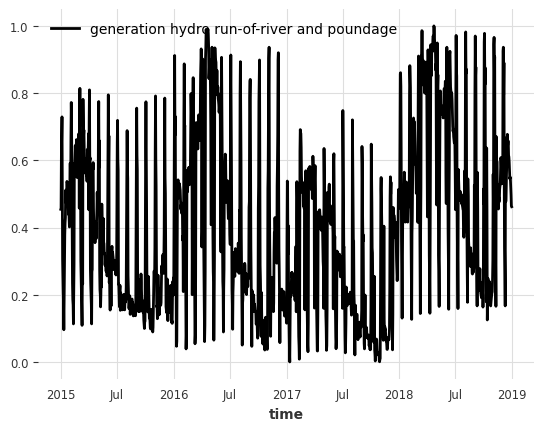

In [50]:
energy_ts_daily_transform.plot()

In [55]:
train_ts , val_ts = energy_ts_daily_transform.split_after(pd.Timestamp('20170901'))

ŸÖÿß ÿß€åŸÜÿ¨ÿß ŸÜ€åÿßÿ≤ ÿ®Ÿá €å⁄©
* covariate  
ÿØÿßÿ±€åŸÖ ⁄©Ÿá ÿ®Ÿá ÿ≥ÿ±€å ÿ≤ŸÖÿßŸÜ€å ŸÖÿß ⁄©ŸÖ⁄© ⁄©ŸÜŸá  ÿ®ÿß ÿßÿ≥ÿ™ŸÅÿßÿØŸá ÿßÿ≤ ŸÖÿ™ÿØ ÿ≤€åÿ± ÿØÿ±ÿ≥ÿ™ÿ¥ ŸÖ€å⁄©ŸÜ€åŸÖ

In [67]:
datetime_attribute_timeseries(time_index =energy_ts_daily_transform,
    attribute = 'day',
    one_hot = True,
    cyclic= False,
    dtype= np.float32).to_dataframe()

day_0  day_1  day_2  day_3  day_4  day_5  day_6  day_7  day_8  \
time                                                                        
2014-12-31    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2015-01-01    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2015-01-02    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2015-01-03    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
2015-01-04    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
2018-12-27    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2018-12-28    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2018-12-29    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2018-12-30    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2018-12-31    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

            day_9  ...  day_21  day_22  day_23  day_24  day_25  day_26  \
time               ...                                                   
2014-12-31    0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
2015-01-01    0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
2015-01-02    0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
2015-01-03    0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
2015-01-04    0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
...           ...  ...     ...     ...     ...     ...     ...     ...   
2018-12-27    0.0  ...     0.0     0.0     0.0     0.0     0.0     1.0   
2018-12-28    0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
2018-12-29    0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
2018-12-30    0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
2018-12-31    0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   

            day_27  day_28  day_29  day_30  
time                                        
2014-12-31     0.0     0.0     0.0     1.0  
2015-01-01     0.0     0.0     0.0     0.0  
2015-01-02     0.0     0.0     0.0     0.0  
2015-01-03     0.0     0.0     0.0     0.0  
2015-01-04     0.0     0.0     0.0     0.0  
...            ...     ...     ...     ...  
2018-12-27     0.0     0.0     0.0     0.0  
2018-12-28     1.0     0.0     0.0     0.0  
2018-12-29     0.0     1.0     0.0     0.0  
2018-12-30     0.0     0.0     1.0     0.0  
2018-12-31     0.0     0.0     0.0     1.0  

[1462 rows x 31 columns]

ŸáŸÖŸàŸÜ ÿ®ÿßŸÑÿß€åÿ≥ ŸÅŸÇÿ∑ ÿ®Ÿá ÿØ€åÿ™ÿß ŸÅÿ±€åŸÖ ÿ™ÿ®ÿØ€åŸÑ ŸÜ⁄©ÿ±€åÿØŸÖ ÿ®ÿ±ÿß€å ÿßÿ≥ÿ™ŸÅÿßÿØŸá 

In [70]:
future_covariate = datetime_attribute_timeseries(time_index =energy_ts_daily_transform,
    attribute = 'day',
    one_hot = True,
    cyclic= False,
    dtype= np.float32)

In [72]:
scaler_cov = Scaler()

In [74]:
future_covariate_transform = scaler_cov.fit_transform(future_covariate)

In [76]:
train_cov , val_cov = future_covariate_transform.split_after(pd.Timestamp('20170901'))

ÿ≠ÿßŸÑÿß ⁄©Ÿá ÿØÿßÿØŸá Ÿáÿß€å ŸÖÿß ÿ®Ÿá ÿ≥ÿ±€å ÿ≤ŸÖÿßŸÜ€å ÿ™ÿ®ÿØ€åŸÑ ÿ¥ÿØ Ÿà ÿ®ÿπÿØÿ¥ ÿßÿ≥ÿ™ÿßŸÜÿØÿßÿ±ÿØ ⁄©ÿ±ÿØ€åŸÖ Ÿà ÿ®ÿπÿØ ⁄©Ÿàÿ±€åÿ¥ŸÜ Ÿáÿßÿ±Ÿà ŸáŸÖ Ÿæ€åÿØÿß ⁄©ÿ±€åÿØŸÖ Ÿà ÿ®ÿßÿ≤ ÿßÿ≥ÿ™ÿßŸÜÿØÿßÿ±ÿØ ⁄©ÿ±€åÿØŸÖ ÿ≠ÿßŸÑÿß ÿ®ÿß€åÿØ ŸÖÿØŸÑŸÖŸàŸÜŸà ÿ®ÿ≥ÿßÿ≤€åŸÖ

from darts.models import RNNModel

In [80]:
enery_rnn_model = RNNModel(
    model="LSTM",
    hidden_dim=30,
    n_rnn_layers=3,
    dropout=0.2,
    n_epochs=20,
    optimizer_kwargs={"lr":1e-3},
    input_chunk_length=60,  # ‚Üê ÿß⁄©ŸÜŸàŸÜ ⁄©Ÿà⁄Ü⁄©‚Äåÿ™ÿ± ÿßÿ≤ ÿ∑ŸàŸÑ ÿØÿßÿØŸá ÿßÿ±ÿ≤€åÿßÿ®€å
    training_length=80,
    likelihood=GaussianLikelihood()
)


In [ ]:
enery_rnn_model.fit(series=train_ts,future_covariates =train_cov)

# historical_forecast Ÿà backtest 

ÿ≠ÿßŸÑÿß ⁄ÜŸàŸÜ ŸÖÿß ŸÜŸÖ€å ÿ™ŸàŸÜ€åŸÖ ÿß€åŸÜÿ¨ÿß ÿßÿ≤ 
* cross validation 
ÿßÿ≥ÿ™ŸÅÿßÿØŸá ⁄©ŸÜ€åŸÖ ÿßÿ≤ ŸÖÿ™ÿØ ÿ≤€åÿ± ⁄©Ÿá ÿ™Ÿàÿ∂€åÿ≠ ÿØÿßÿØŸÖ ÿßÿ≥ÿ™ŸÅÿßÿØŸá ŸÖ€å⁄©ŸÜ€åŸÖ

In [85]:
historical_forecasts_energy = enery_rnn_model.historical_forecasts(
                                    series=energy_ts_daily_transform,
                                    future_covariates=future_covariate_transform,
                                    num_samples=50,
                                    start=0.5,
                                    forecast_horizon=30,
                                    retrain=False,
                                    stride=5,
                                    last_points_only=False  # üëà ŸÖŸáŸÖ
                                    )

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


In [86]:
print(f"ÿ™ÿπÿØÿßÿØ Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å‚ÄåŸáÿß: {len(historical_forecasts_energy)}")


ÿ™ÿπÿØÿßÿØ Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å‚ÄåŸáÿß: 141


In [87]:
from darts.metrics import mape, mae

# ÿßÿ¨ÿ±ÿß€å backtest ÿ®ÿß ŸÖÿ™ÿ±€å⁄© MAE
mae_score = enery_rnn_model.backtest(
    series=energy_ts_daily_transform,
    future_covariates=future_covariate_transform,
    historical_forecasts=historical_forecasts_energy,
    metric=mae,
    retrain=False,
    verbose=True,
    last_points_only=False  # üëà ÿ®ÿß ⁄Øÿ≤€åŸÜŸá ÿ®ÿßŸÑÿß ŸáŸÖÿÆŸàÿßŸÜ€å ÿØÿßÿ±ÿØ
)

In [88]:
print("MAE:", mae_score)

MAE: 0.15634730757868037


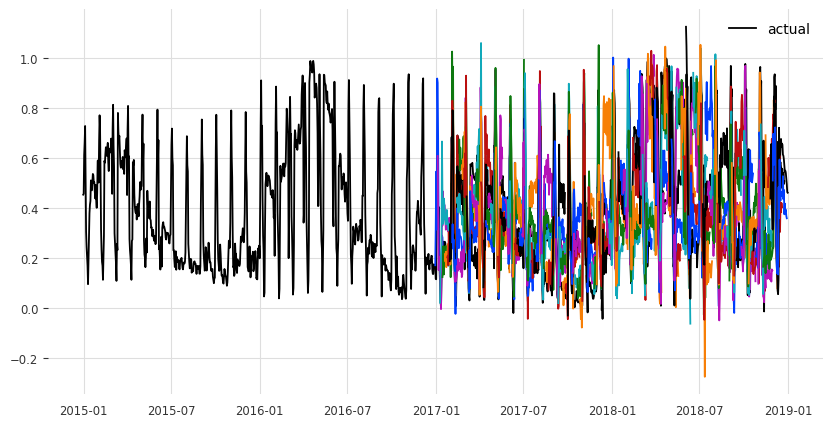

In [131]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(energy_ts_daily_transform.time_index, energy_ts_daily_transform.values(), label="actual")
for i, forecast in enumerate(historical_forecasts_energy):
    plt.plot(forecast.time_index, forecast.values())
plt.legend()
plt.show()


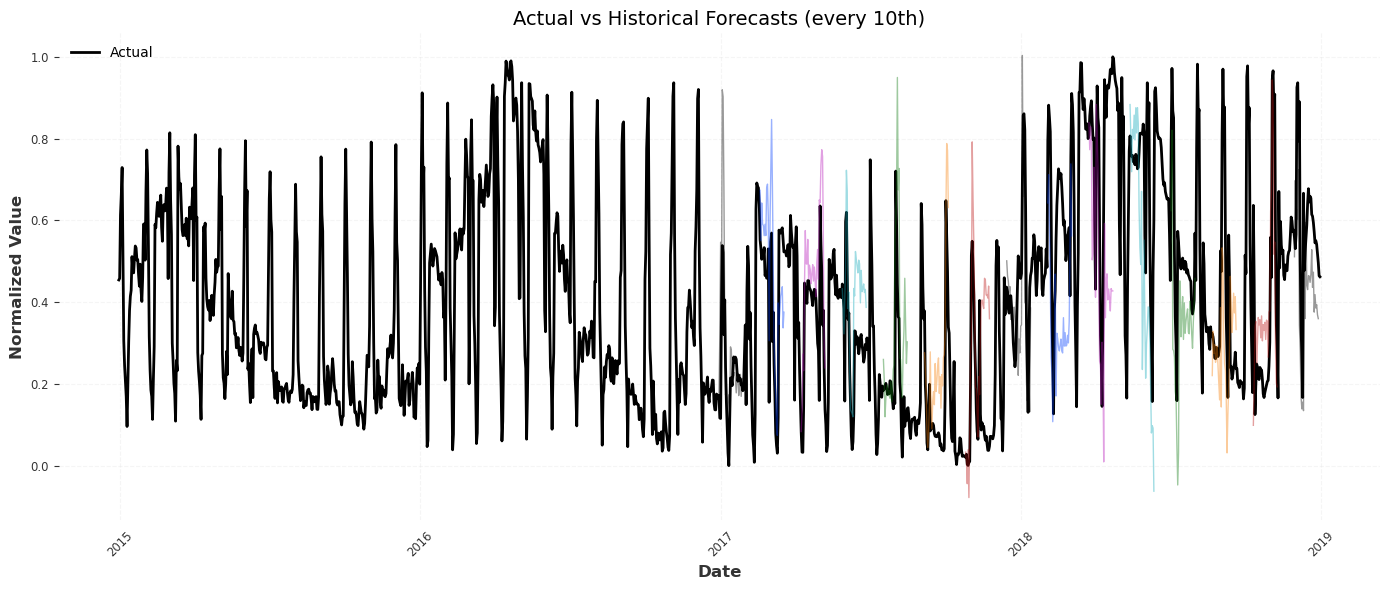

In [159]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(14, 6))

# ÿ≥ÿ±€å ŸàÿßŸÇÿπ€å
plt.plot(energy_ts_daily_transform.time_index, energy_ts_daily_transform.values(),
         label="Actual", color="black", linewidth=2)

# Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å‚ÄåŸáÿß ÿ®ÿß ⁄ØÿßŸÖ ŸÅÿßÿµŸÑŸá
for i, forecast in enumerate(historical_forecasts_energy[::10]):  # Ÿáÿ± 10 ÿ™ÿß€å €å⁄©€å
    plt.plot(forecast.time_index, forecast.values(), alpha=0.4, linewidth=1)

# ÿ™ŸÜÿ∏€åŸÖÿßÿ™ ŸÜŸÖŸàÿØÿßÿ±
plt.title("Actual vs Historical Forecasts (every 10th)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Normalized Value", fontsize=12)

# ÿ™ÿßÿ±€åÿÆ‚ÄåŸáÿß€å ÿ≤€åÿ®ÿßÿ™ÿ±
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

# ÿ¥ÿ®⁄©Ÿá Ÿà ÿ™Ÿàÿ∂€åÿ≠ÿßÿ™
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(loc='upper left', fontsize='medium')
plt.tight_layout()
plt.show()


In [149]:
import matplotlib.pyplot as plt
import numpy as np

def plot_forecasts_custom(actual_series, forecast_list, every_n=10, quantile_bands=False):
    import matplotlib.pyplot as plt

    plt.figure(figsize=(30, 6))
    plt.plot(actual_series.time_index, actual_series.values(), label='Actual', color='black')

    for i, forecast in enumerate(forecast_list[::every_n]):
        try:
            if quantile_bands and forecast.n_samples > 1:
                q_hi = forecast.quantile(0.95)
                q_lo = forecast.quantile(0.05)
                plt.fill_between(
                    forecast.time_index,
                    q_lo.values().squeeze(),
                    q_hi.values().squeeze(),
                    color="gray",
                    alpha=0.2
                )
        except:
            pass  # ÿØÿ± ÿµŸàÿ±ÿ™ ŸÜÿ®ŸàÿØŸÜ ÿßŸÖ⁄©ÿßŸÜ ŸÖÿ≠ÿßÿ≥ÿ®Ÿá quantileÿå ŸÅŸÇÿ∑ ÿ≥ÿ±€å ÿ±ÿß ÿ±ÿ≥ŸÖ ⁄©ŸÜ

        plt.plot(forecast.time_index, forecast.values(), label=f'Forecast {i*every_n}', alpha=0.6)

    plt.title("Actual vs Historical Forecasts")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.legend(loc='upper left', fontsize='small')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


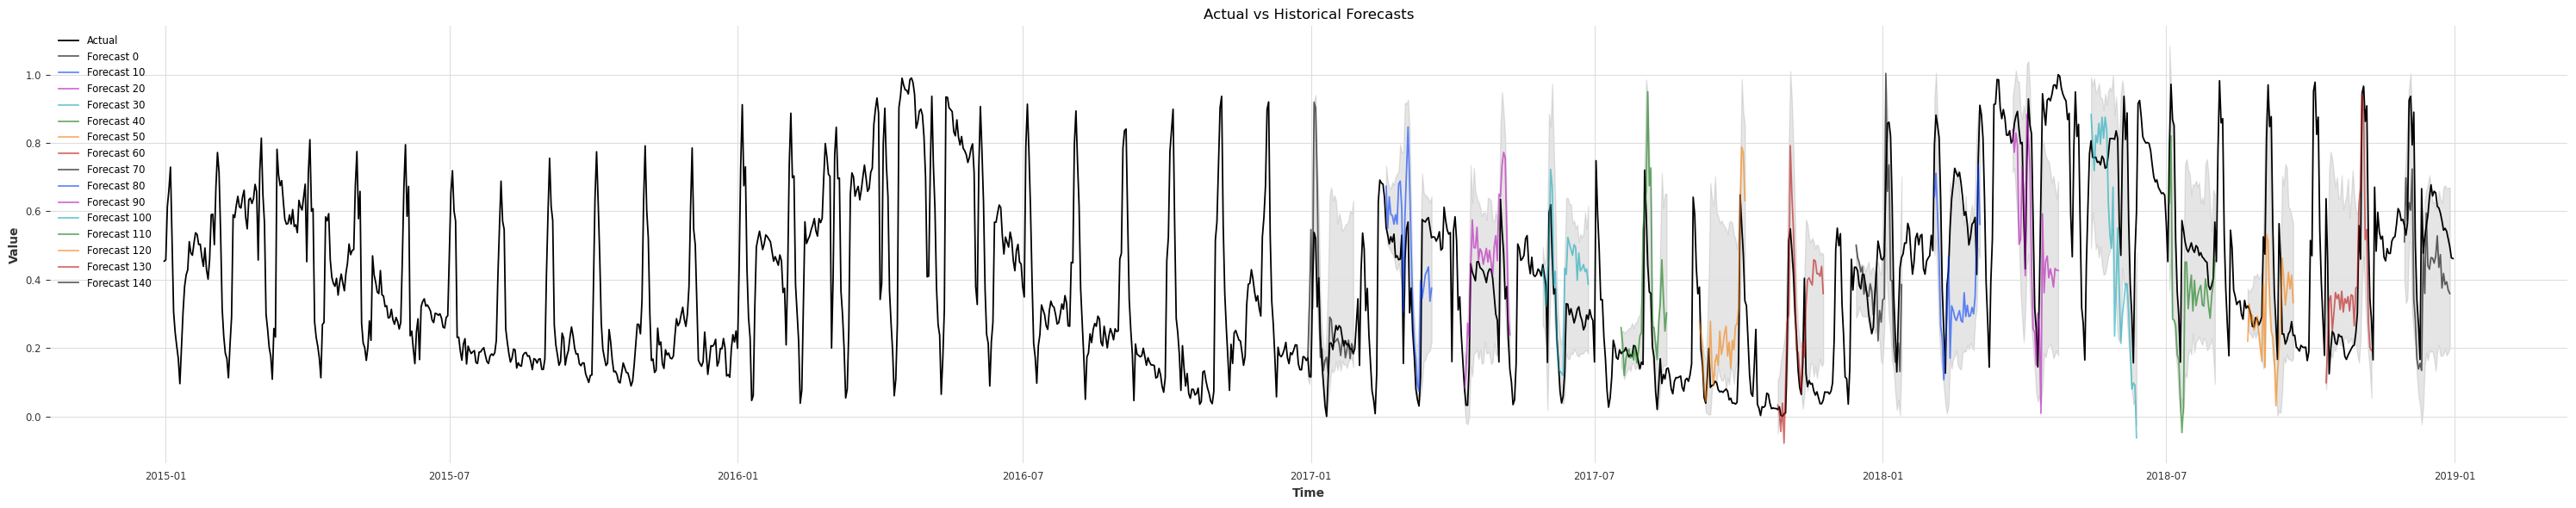

In [151]:
plot_forecasts_custom(
    actual_series=energy_ts_daily_transform,
    forecast_list=historical_forecasts_energy,
    every_n=10,            # Ÿáÿ± ÿØŸá ÿ™ÿß €å⁄©€å
    quantile_bands=True    # ŸÜŸÖÿß€åÿ¥ ÿ®ÿßÿ≤Ÿá Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å
)
